NARRATIVE ANALYTICS

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

artists = pd.read_csv('files/artist_data.csv')
works = pd.read_csv('files/artwork_data.csv')


art = works.artist.value_counts().head(20)
#art.plotplt.plt.ylabel('Artworks Count')
plt.bar(art.index, art.values, art.color)

plt.show()

AttributeError: 'Series' object has no attribute 'color'

Narrative Analytics Guided Example

TATE COLLECTION DATA EXPLORATION

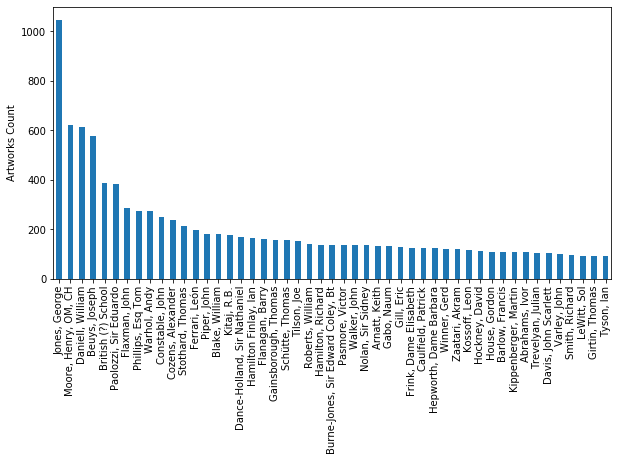

In [4]:
works.artist.value_counts().head(50)[1:51].plot(kind='bar', figsize=(10,5))
plt.ylabel('Artworks Count')
plt.show()

In [5]:
len(artists)

3532

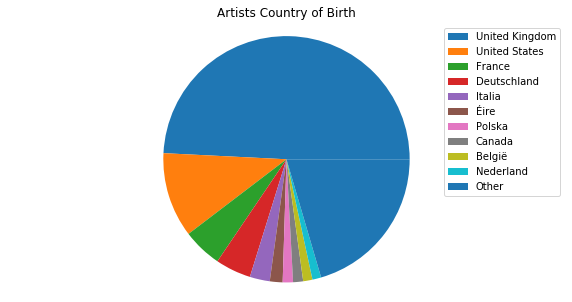

In [6]:
# Process data to create counts by country

# Split the place of birth on commas
locations = artists.placeOfBirth.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []

# Process countries and clean up text
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['country'])

# Create numeric counts
cntry_counts = pd.DataFrame(countries.country.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
cntry_counts.loc[11] = other
cntry_counts = cntry_counts.rename(index={11: 'Other'})

# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.country)
plt.axis('equal')
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index)
plt.show()

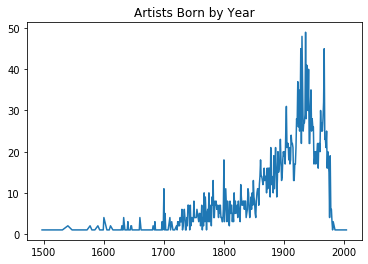

In [7]:
plt.plot(artists.yearOfBirth.value_counts().sort_index())
plt.title('Artists Born by Year')
plt.show()

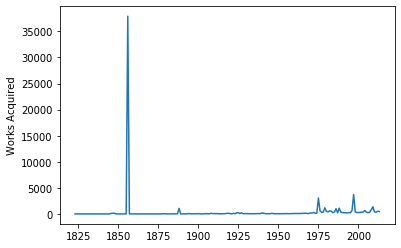

In [8]:
acquisition_df = pd.DataFrame(works.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')
plt.show()

Text(0, 0.5, 'Works Acquired')

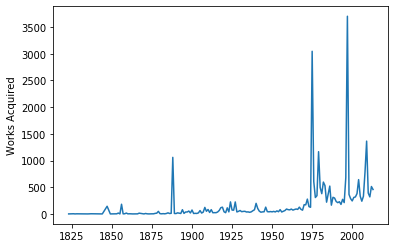

In [9]:
acquisition_df = pd.DataFrame(works[works.artist != 'Turner, Joseph Mallord William'].acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

Text(0.5, 1.0, 'Artists Who are No Longer Living')

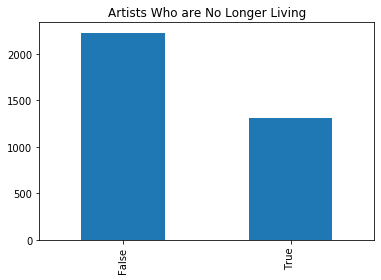

In [10]:
living = pd.DataFrame(artists.yearOfDeath.isnull())
living = pd.DataFrame(living.yearOfDeath.value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Longer Living')

In [11]:
works.medium.value_counts().head(10)

Graphite on paper                            26167
Oil paint on canvas                           3383
Screenprint on paper                          2984
Lithograph on paper                           2721
Watercolour on paper                          1890
Etching on paper                              1793
Graphite and watercolour on paper             1680
Ink on paper                                   880
Intaglio print on paper                        820
Photograph, gelatin silver print on paper      750
Name: medium, dtype: int64

In [12]:
# Remove Turner
turnerless_artworks = works[works['artist'] != 'Turner, Joseph Mallord William']
# Coerce to Numeric
turnerless_artworks.height = pd.to_numeric(turnerless_artworks.height, errors = 'coerce')
turnerless_artworks.width = pd.to_numeric(turnerless_artworks.width, errors = 'coerce')
turnerless_artworks.depth = pd.to_numeric(turnerless_artworks.depth, errors = 'coerce')
turnerless_artworks = turnerless_artworks[turnerless_artworks['units']=='mm']
turnerless_artworks = turnerless_artworks[turnerless_artworks.height.notnull()]

## The error is just because of how we did the conditional select and we don't need to be worried about it...

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
## Aggregate to new medium_agg column
turnerless_artworks['medium_agg'] = 'other'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paper", na=False),'medium_agg'] = 'paper'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("canvas", na=False),'medium_agg'] = 'canvas'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("wood", na=False),'medium_agg'] = 'wood'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paint on", na=False),'medium_agg'] = 'other painted panel'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Bronze", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Plaster", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Marble", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Stone", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("plate", na=False),'medium_agg'] = 'plate'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("photograph", na=False),'medium_agg'] = 'photo'

turnerless_artworks['surface'] = turnerless_artworks.height * turnerless_artworks.width

In [14]:
turnerless_artworks[['medium_agg','height','width','depth','surface']].groupby('medium_agg').describe()

height                                                   \
                       count         mean          std    min     25%     50%   
medium_agg                                                                      
canvas                 260.0  1776.396154  1543.269130  105.0  729.25  1512.5   
other                 1301.0  1189.179554  1866.683697    6.0  273.00   620.0   
other painted panel   4408.0  1032.772913   820.503273   45.0  514.00   787.0   
paper                19800.0   417.212288   379.088368   15.0  200.00   320.0   
photo                  192.0  1286.786458  2106.887208   90.0  303.50   690.0   
plate                  344.0   347.148256   478.247577   76.0  305.00   305.0   
sculpture              639.0   619.608764   791.822922   18.0  222.00   406.0   
wood                   349.0  1067.189112  1597.806055   30.0  340.00   611.0   

                                         width               ...    depth  \
                         75%      max    count         mean  ...      75%   
medium_agg                                                   ...            
canvas               2290.75  16000.0    259.0  1495.119691  ...    53.00   
other                1460.00  37500.0   1298.0   960.942604  ...   750.00   
other painted panel  1270.00  11900.0   4408.0   960.962568  ...    55.00   
paper                 559.00  10619.0  19780.0   407.575925  ...   184.00   
photo                1395.25  19890.0    190.0   973.368421  ...   146.50   
plate                 305.00   8850.0    344.0   264.523256  ...  1107.75   
sculpture             714.50  11250.0    639.0   765.388106  ...   445.00   
wood                 1073.00  14850.0    349.0  1065.908309  ...   510.00   

                              surface                                       \
                         max    count          mean           std      min   
medium_agg                                                                   
canvas                2185.0    259.0  3.424765e+06  3.831638e+06  12600.0   
other                18290.0   1298.0  1.880836e+06  4.996881e+06   1681.0   
other painted panel   5486.0   4408.0  1.392090e+06  2.247036e+06   3306.0   
paper                 5000.0  19780.0  2.608455e+05  7.540381e+05    237.0   
photo                 2015.0    190.0  2.408794e+06  6.188098e+06  13320.0   
plate                12360.0    344.0  1.258063e+05  4.437804e+05   7752.0   
sculpture             5800.0    639.0  6.975306e+05  1.405889e+06   1296.0   
wood                  6300.0    349.0  2.160677e+06  8.422669e+06   6300.0   

                                                                  
                          25%        50%        75%          max  
medium_agg                                                        
canvas               551863.5  2283380.0  4707935.5   21731950.0  
other                 87543.5   395599.5  1597850.0   91253940.0  
other painted panel  291732.5   624755.0  1558060.5   36233100.0  
paper                 39042.0   102994.0   315810.0   32376000.0  
photo                 98967.5   388417.5  1696120.0   54315000.0  
plate                 69845.0    69845.0    69845.0    6549000.0  
sculpture             77770.5   203200.0   662296.5   17964018.0  
wood                 141600.0   496600.0  1247400.0  132462000.0  

[8 rows x 32 columns]

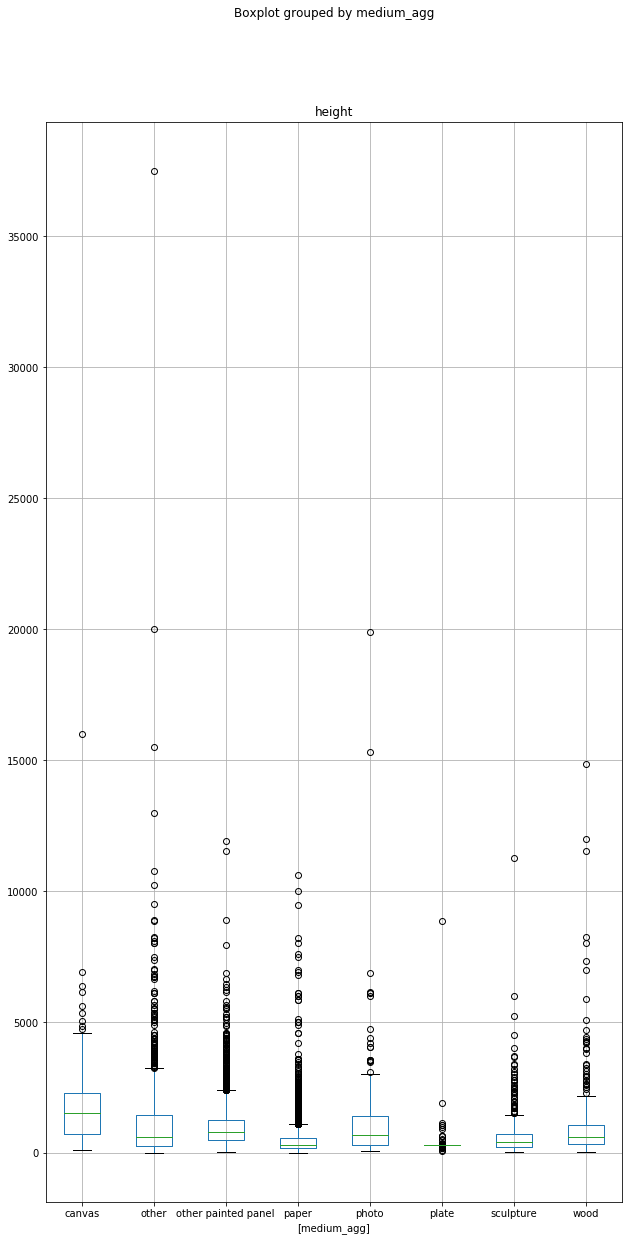

In [15]:
turnerless_artworks[['medium_agg', 'height']].boxplot(by='medium_agg', figsize=(10,20))